In [11]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import sklearn
import pandas as pd
import os
import sys
import time
import tensorflow as tf

from tensorflow import keras

print(tf.__version__)
print(sys.version_info)
for module in mpl, np, pd, sklearn, tf, keras:
    print(module.__name__, module.__version__)


2.2.0
sys.version_info(major=3, minor=6, micro=9, releaselevel='final', serial=0)
matplotlib 3.2.1
numpy 1.18.5
pandas 1.0.4
sklearn 0.23.1
tensorflow 2.2.0
tensorflow.keras 2.3.0-tf


In [12]:
fashion_mnist = keras.datasets.fashion_mnist
(x_train_all, y_train_all), (x_test, y_test) = fashion_mnist.load_data()
x_valid, x_train = x_train_all[:5000], x_train_all[5000:]
y_valid, y_train = y_train_all[:5000], y_train_all[5000:]

print(x_valid.shape, y_valid.shape)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(5000, 28, 28) (5000,)
(55000, 28, 28) (55000,)
(10000, 28, 28) (10000,)


In [13]:
# x = (x - u) / std

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
# x_train: [None, 28, 28] -> [None, 784]
x_train_scaled = scaler.fit_transform(
    x_train.astype(np.float32).reshape(-1, 1)).reshape(-1, 28, 28)
x_valid_scaled = scaler.transform(
    x_valid.astype(np.float32).reshape(-1, 1)).reshape(-1, 28, 28)
x_test_scaled = scaler.transform(
    x_test.astype(np.float32).reshape(-1, 1)).reshape(-1, 28, 28)


In [14]:
# tf.keras.models.Sequential()

model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
for _ in range(20):
    model.add(keras.layers.Dense(100, activation="selu"))#把之前的relu改为了selu
model.add(keras.layers.Dense(10, activation="softmax"))

model.compile(loss="sparse_categorical_crossentropy",
              optimizer = keras.optimizers.SGD(0.001),
              metrics = ["accuracy"])

In [21]:
help(keras.layers.Dense)

Help on class Dense in module tensorflow.python.keras.layers.core:

class Dense(tensorflow.python.keras.engine.base_layer.Layer)
 |  Just your regular densely-connected NN layer.
 |  
 |  `Dense` implements the operation:
 |  `output = activation(dot(input, kernel) + bias)`
 |  where `activation` is the element-wise activation function
 |  passed as the `activation` argument, `kernel` is a weights matrix
 |  created by the layer, and `bias` is a bias vector created by the layer
 |  (only applicable if `use_bias` is `True`).
 |  
 |  Note: If the input to the layer has a rank greater than 2, then `Dense`
 |  computes the dot product between the `inputs` and the `kernel` along the
 |  last axis of the `inputs` and axis 1 of the `kernel` (using `tf.tensordot`).
 |  For example, if input has dimensions `(batch_size, d0, d1)`,
 |  then we create a `kernel` with shape `(d1, units)`, and the `kernel` operates
 |  along axis 2 of the `input`, on every sub-tensor of shape `(1, 1, d1)`
 |  (ther

In [15]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_21 (Dense)             (None, 100)               78500     
_________________________________________________________________
dense_22 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_23 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_24 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_25 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_26 (Dense)             (None, 100)              

In [16]:
len(model.layers)

22

In [17]:
# Tensorboard, earlystopping, ModelCheckpoint
logdir = './dnn-selu-callbacks'
if not os.path.exists(logdir):
    os.mkdir(logdir)
output_model_file = os.path.join(logdir,
                                 "fashion_mnist_model.h5")

callbacks = [
    keras.callbacks.TensorBoard(logdir),
    keras.callbacks.ModelCheckpoint(output_model_file,
                                    save_best_only = True),
    keras.callbacks.EarlyStopping(patience=5, min_delta=1e-3),
]
history = model.fit(x_train_scaled, y_train, epochs=100,
                    validation_data=(x_valid_scaled, y_valid),
                    callbacks = callbacks)

Epoch 1/100
1719/1719 [==============================] - 9s 5ms/step - loss: 0.6853 - accuracy: 0.7569 - val_loss: 0.5183 - val_accuracy: 0.8232
Epoch 2/100
1719/1719 [==============================] - 8s 5ms/step - loss: 0.4812 - accuracy: 0.8255 - val_loss: 0.4574 - val_accuracy: 0.8368
Epoch 3/100
1719/1719 [==============================] - 8s 5ms/step - loss: 0.4302 - accuracy: 0.8428 - val_loss: 0.4420 - val_accuracy: 0.8412
Epoch 4/100
1719/1719 [==============================] - 8s 5ms/step - loss: 0.3995 - accuracy: 0.8564 - val_loss: 0.4077 - val_accuracy: 0.8542
Epoch 5/100
1719/1719 [==============================] - 9s 5ms/step - loss: 0.3776 - accuracy: 0.8624 - val_loss: 0.3940 - val_accuracy: 0.8566
Epoch 6/100
1719/1719 [==============================] - 9s 5ms/step - loss: 0.3600 - accuracy: 0.8697 - val_loss: 0.3973 - val_accuracy: 0.8568
Epoch 7/100
1719/1719 [==============================] - 8s 4ms/step - loss: 0.3454 - accuracy: 0.8740 - val_loss: 0.3781 - val_ac

In [18]:
print(history.history)

{'loss': [0.6853417754173279, 0.4811970591545105, 0.43016889691352844, 0.3995111882686615, 0.3775902986526489, 0.3600160479545593, 0.3454486131668091, 0.3328794836997986, 0.32182347774505615, 0.3118446171283722, 0.3032621741294861, 0.29461097717285156, 0.2875731289386749, 0.2808607816696167, 0.27413681149482727, 0.2670440375804901, 0.26120951771736145, 0.2555902600288391, 0.2507016658782959, 0.2459203004837036, 0.23935569822788239], 'accuracy': [0.7568727135658264, 0.8255454301834106, 0.8428182005882263, 0.8563636541366577, 0.8623636364936829, 0.8696908950805664, 0.8740181922912598, 0.8799818158149719, 0.8825818300247192, 0.8867636322975159, 0.8903454542160034, 0.8931636214256287, 0.8949454426765442, 0.8973454833030701, 0.9003999829292297, 0.9020909070968628, 0.9044545292854309, 0.9051454663276672, 0.9073818325996399, 0.9094908833503723, 0.9118363857269287], 'val_loss': [0.5183234214782715, 0.45738378167152405, 0.44200658798217773, 0.4077020585536957, 0.3940220773220062, 0.397338032722

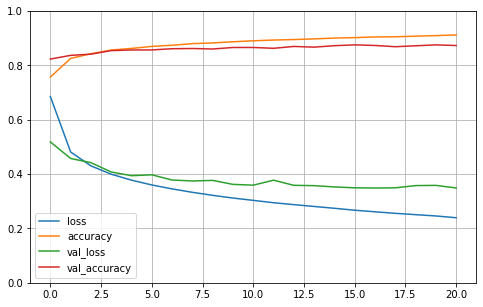

In [19]:
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8, 5))
    plt.grid(True)
    plt.gca().set_ylim(0, 1)
    plt.show()

plot_learning_curves(history)

# 1. 参数众多，训练不充分
# 2. 梯度消失 -> 链式法则 -> 复合函数f(g(x))
#    selu缓解梯度消失

In [20]:
model.evaluate(x_test_scaled, y_test, verbose=0)

[0.3881970942020416, 0.8700000047683716]